##### 불린저 밴드??
###### 주가는 등락을 거듭하지만 통계적으로 보면, 중심선인 이동평균선을 따라 일정한 밴드 범위 안에서 움직인다.
###### 이와 같이 이동평균선을 중심으로 표준편차 범위 내에서 주가가 움직인다는 것을 전제로 하여, 위쪽에 상한 밴드, 아래쪽에 하한 밴드를 만들면 변동폭의 띠가 형성되는데 이를 Bollinger Band라고 한다.

#### 이동평균선 따라 매매하자. 이동평균선을 보면 주가의 방향성과 변곡점을 쉽게 알 수 있어 마음편한 매매가 가능하다.

### 주가의 진행방향을 나타내므로 미래의 주가 동향을 예측할 수 있게 해준다..

#### 최근일부터 계산, 가장 먼 날짜를 빼고 최근일을 포함하는 선입선출 방식으로 단순평균을 낸다

### 활용방법
##### 1. 상승추세 : 이동평균선이 상승.. 주가가 5일 이동평균선 위에 있는 경우. 상승세 지속

##### 2. 하락추세 : 이동평균선이 하락.. 주가가 5일 이동평균선 아래에 있는 경우.

##### 3. 횡보추세 : 이동평균선이 횡보하는 동안에는 주가가 횡보..

### 위를 바탕으로 매수, 매도 시점을 파악한다

##### 1. 상승 전환 : 하락하던 주가가 5일 이동평균선을 상향 돌파하면 매수시점으로 본다. 주가가 5일, 20일 이동평균선을 차례로 돌파, 5일 이동평균선도 상승으로 돌아서면 적극 매수

##### 2. 하락 전환 : 상승하던 주가가 5일 이동평균선을 하락 돌파하면 매도시점. 주가가 5일선, 20일선을 차례로 돌파하고 5일이동평균선도 하락으로 전환되면 적극 매도.

##### 3. 횡보 : 이동평균선이 횡보하는 상태에서 주가가 이동평균선 위로 상승하면 매수, 하락하면 매매. 
##### 특히 주가가 장기 하락하여 주가와 이동평균선이 수렴한 곳에서 주가가 5일선 또는 20일선 등 중단기 이동평균성르 동시에 돌파하면서 상승할 대는 주가 상승폭이 클 것으로 예상. 
##### 주가가 장기간 횡보하며 급한 매물이 정리된 상태에서 들어온 신규 매수세력이 위력이 발휘할 것으로 보기 때문. 
##### 반대로 주가가 장기 상승을 보인 후 고점에서 5일, 20일 이동평균선이 수렴한 상태로 주가가 이동평균선 아래로 떨어지면 하락폭이 클 것으로 보고 적극 매도.

### 결론 - 골든크로스와 데드크로스를 활용한다.
##### 골든크로스 : 단기 이동평균선이 장기 이동평균선 아래에서 위로 상향 돌파하는 경우. 좋은 매수시점.
##### 데드크로스 : 단기 이동평균선이 장기 이동평균선을 위에서 아래로 하향 돌파하는 경우. 좋은 매도시점.

##### 이동평균선은 장기일 때는 그 질량이 크므로, 단기 이동평균선이 중장기 이동평균선과 같은 방향일 때는 추세가 강화되고, 다른 방향일 때는 보다 힘이 센 장기선의 방향으로 단기선이 끌려가게 된다. 
##### 따라서 일봉에서 5일 이동평균선과 20일 이동평균선이 데드크로스를 그리더라도 120일, 200일 이동평균선이 상승추세를 이어간다면 이 데드크로스는 오히려 매수시점으로 보아야한다. 
##### 또한 20일 이동평균선이 60일 이동평균선을 돌파하는 골든크로스가 나타난다고 하더라도 중장기 선인 120일, 200일 이동평균선이 하락을 이어간다면 매도시점으로 보아야 한다.

In [6]:
def zeroFill(columnValue):

    columnValue = str(columnValue)

    outValue = columnValue.zfill(6) ## zerofill 6자리로 채워라

    return outValue

def decideDaysList(table):

    targetTable = table.reset_index()

    DateArray = targetTable.Date

    return DateArray    

def lastDay(table):

    targetTable = table.reset_index()

    DateArray = targetTable.Date
    
    length = len(DateArray)
    
    lastday = DateArray[length-1]
    
    return lastday   

def decideDaysList(table):

    targetTable = table.reset_index()

    DateArray = targetTable.Date

    return DateArray   

def lastDay(table):

    targetTable = table.reset_index()

    DateArray = targetTable.Date
    
    length = len(DateArray)
    
    lastday = DateArray[length-1]
    
    return lastday   

## 3. 적절한 종목인지 판단하는 함수를 만들어보자

### 3-1. 부실위험이 있거나 매출액, 영업이익이 감소하는 추세의 종목
### 3-2. 일일 평균거래량이 3만주 이내로 적은 종목
### 3-3. 단기에 지나치게 급등한 종목
### 3-4. 동일업종 비교 per  

### 과열종목 판단 함수. true 일 경우 최근 상대강도과열종목.
def overHeatStock(stockCode):
    from bs4 import BeautifulSoup 
    import requests 
    import datetime
    from datetime import date, timedelta
    import FinanceDataReader as fdr
    
    
    stock_code =  str(stockCode).zfill(6)
    end = date.today()  
    start = date.today() - timedelta(365) # 1년 데이터.
    targetStock = fdr.DataReader(stock_code, start, end)
    df_krx = fdr.StockListing('KRX')
    targetName = df_krx.loc[df_krx.Symbol == stock_code].Name.item() ## 해당 종목 이름 가져오기
    
    overHeatUrl = 'https://finance.naver.com/sise/item_overheating_2.nhn'
    resp = requests.get(url=overHeatUrl) ## response 200 = 정상, 확인완료
    resp.encoding = "euc-kr" ## 인코딩
    html = resp.text
    htmlObj = BeautifulSoup(html, "html.parser") ## beautifulSoup 사용

    ## 목표 테이블 추출. 상대강도과열종목의 이름 List
    targetList = htmlObj.findAll("a","tltle")

    targetList[0].text

    overHeatNameList = []

    for i in range(0, len(targetList)):
        overHeatNameList.append(targetList[i].text)


    for i in range(0, len(overHeatNameList)):
        if targetName == overHeatNameList[i]:
            return True
        else: return False            

### 동일업종 per과 해당 종목간의 per 비교 함수. 1 리턴 -> PER수치 괜찮다
def comparePER(stockCode):
    #from bs4 import BeautifulSoup 
    import requests 
    import pandas as pd
    #import datetime
    #from datetime import date, timedelta
    import FinanceDataReader as fdr

    # stock_code = '5490'
    stock_code =  str(stockCode).zfill(6)
    
    
    url = 'https://finance.naver.com/item/main.nhn?code='+stock_code
    table_df_list = pd.read_html(url, encoding='euc-kr')    
    earningInfo = table_df_list[3]

    targetStockAvgPER = float(earningInfo.values[10][5:-1].mean())
    sameBusniessPER = table_df_list[9]
    targetBusniessPER = sameBusniessPER[1].values[0]
    targetBusniessPER = float(targetBusniessPER.split("배")[0])

    if targetStockAvgPER <= targetBusniessPER:
        return 1
    else: return 2

### 여러 조건 종합, 투자하기 좋은 조건의 종목인지 판단하는 함수. 0 리턴 -> 괜찮은 회사다

def isGoodStock(stockCode):
    from bs4 import BeautifulSoup 
    import requests 
    import pandas as pd
    import datetime
    from datetime import date, timedelta
    import FinanceDataReader as fdr

    stock_code = zeroFill(stockCode)

    end = date.today()  
    start = date.today() - timedelta(365) # 1년 데이터.
    targetStock = fdr.DataReader(stock_code, start, end)
    df_krx = fdr.StockListing('KRX')
    targetName = df_krx.loc[df_krx.Symbol == stock_code].Name.item()

    url = 'https://finance.naver.com/item/main.nhn?code='+stock_code
    table_df_list = pd.read_html(url, encoding='euc-kr')    
    earningInfo = table_df_list[3]
    earningArray = earningInfo.values[4][1:5]
    
    debtRatio = earningInfo.values[6]
    AvgDebtRatio = debtRatio[5:9].mean()
    
    # 3-1. 매출액이 감소하는 추세인지 확인해보자. 10퍼센트 이상 올랐으면 true,  아니면 false
    recentEarningRate = pd.DataFrame(earningArray)
    dropNaEarningRate = recentEarningRate.dropna()
    recentGrowthRate = float(dropNaEarningRate.values[-1])

 
    if recentGrowthRate < 0.1:
        return 1

        # 3-2. 부채비율이 200이상인 부실기업인지 확인해보자.
    elif AvgDebtRatio >= 200:
         return 2

        # 3-3. 일일 평균거래량이 3만주 이내로 적은 종목
    elif targetStock.Volume.mean() < 30000:
         return 3
        # 3-4 상대강도과열종목인지()
    elif overHeatStock(stock_code) == True:
         return 4
        # 3-5. 동일업종 PER보다 해당 종목의 PER이 낮은지 확인해본다.
    elif comparePER(stock_code) == 2:
         return 5

    else: return 0 
    

#isGoodStock(1440)

## 추세선 그리는 함수

def drawGraph(stockCode):
    import urllib.parse ## url encoding
    import FinanceDataReader as fdr
    import datetime
    from datetime import date, timedelta
    import matplotlib.pyplot as plt
    #stock_code = '5490'
    stock_code = zeroFill(stockCode)
    df_krx = fdr.StockListing('KRX')

    MA_5 = 5 ## 단기추세선
    MA_20 = 20 ## 단기추세선
    MA_60 = 60 ## 단기추세선
    MA_120 = 120 ## 장기추세선
    MA_200 = 200 ## 장기추세선

    end = date.today()  
    start = date.today() - timedelta(365) # 1년 데이터.
    targetStock = fdr.DataReader(stock_code, start, end)
   # targetName = df_krx.loc[df_krx.Symbol == stock_code].Name.item()
  
    # STOCK["MA_5"]=STOCK["Close"].rolling(window=5).mean_periods=1.mean()
    targetStock["MA_5"]=targetStock["Close"].rolling(window=MA_5).mean() # min_periods=1 5일치 종가를 가져와 rolling
    targetStock["MA_20"]=targetStock["Close"].rolling(window=MA_20).mean()
    targetStock["MA_60"]=targetStock["Close"].rolling(window=MA_60).mean()
    targetStock["MA_120"]=targetStock["Close"].rolling(window=MA_120).mean()
    targetStock["MA_200"]=targetStock["Close"].rolling(window=MA_200).mean()

    MA_5_data = targetStock.MA_5
    MA_20_data = targetStock.MA_20
    MA_60_data = targetStock.MA_60
    MA_120_data = targetStock.MA_120
    MA_200_data = targetStock.MA_200

    targetStock["MA_5_change"] = MA_5_data.pct_change() 
    targetStock["MA_20_change"] = MA_20_data.pct_change() 
    targetStock["MA_60_change"] = MA_60_data.pct_change() 
    targetStock["MA_120_change"] = MA_120_data.pct_change() 
    targetStock["MA_200_change"] = MA_200_data.pct_change() 

    targetStock["MA_5_change_per"] = targetStock.MA_5_change.pct_change()
    targetStock["MA_20_change_per"] = targetStock.MA_20_change.pct_change()
    targetStock["MA_60_change_per"] = targetStock.MA_60_change.pct_change()
    targetStock["MA_120_change_per"] = targetStock.MA_120_change.pct_change()
    targetStock["MA_200_change_per"] = targetStock.MA_200_change.pct_change()


    plt.figure(figsize = (16,10))

    plt.subplot(311)
    plt.plot(targetStock.index, targetStock['Close'], label = 'Close')
    plt.plot(targetStock.index, targetStock['MA_5'], label='MA 5day')
    plt.plot(targetStock.index, targetStock['MA_20'], label='MA 20day')
    plt.plot(targetStock.index, targetStock['MA_60'], label='MA 60day')
    plt.plot(targetStock.index, targetStock['MA_120'], label='MA 120day')
    plt.plot(targetStock.index, targetStock['MA_200'], label='MA 200day')
    plt.title("moving average")
    plt.legend(loc='best') 

    plt.subplot(312)
    plt.plot(targetStock.index, targetStock['MA_5_change_per'], label = 'MA_5_change_per')
    plt.plot(targetStock.index, targetStock['MA_20_change_per'], label='MA_20_change_per')
    #plt.plot(targetStock.index, targetStock['MA_60_change_per'], label='MA_60_change_per')
    #plt.plot(targetStock.index, targetStock['MA_120_change_per'], label='MA_120_change_per')
    #plt.plot(targetStock.index, targetStock['MA_200_change_per'], label='MA_200_change_per')
    plt.title("MA_short_change")
    plt.legend(loc='best')

    plt.subplot(313)
    plt.plot(targetStock.index, targetStock['MA_60_change_per'], label='MA_60_change_per')
    plt.plot(targetStock.index, targetStock['MA_120_change_per'], label='MA_120_change_per')
    plt.plot(targetStock.index, targetStock['MA_200_change_per'], label='MA_200_change_per')
    plt.title("MA_long_change") 
    plt.legend(loc='best')  

#drawGraph(1440)

## 종목 선정은 끝낫으니 사고 파는걸 결정하는 함수를 선언

def sellBuyDay(stockCode):
    import urllib.parse ## url encoding
    import FinanceDataReader as fdr
    import datetime
    from datetime import date, timedelta
    import matplotlib.pyplot as plt
    %matplotlib inline
    import platform 

    #stock_code = '5490'

    stock_code = zeroFill(stockCode)


    df_krx = fdr.StockListing('KRX')

    MA_5 = 5 ## 단기추세선
    MA_20 = 20 ## 단기추세선
    MA_60 = 60 ## 단기추세선
    MA_120 = 120 ## 장기추세선
    MA_200 = 200 ## 장기추세선

    end = date.today()  
    start = date.today() - timedelta(365) # 1년 데이터.
    targetStock = fdr.DataReader(stock_code, start, end)
    targetName = df_krx.loc[df_krx.Symbol == stock_code].Name.item()

    # STOCK["MA_5"]=STOCK["Close"].rolling(window=5).mean_periods=1.mean()
    targetStock["MA_5"]=round(targetStock["Close"].rolling(window=MA_5, min_periods=1).mean()) # min_periods=1 5일치 종가를 가져와 rolling
    targetStock["MA_20"]=round(targetStock["Close"].rolling(window=MA_20, min_periods=1).mean())
    targetStock["MA_60"]=round(targetStock["Close"].rolling(window=MA_60, min_periods=1).mean())
    targetStock["MA_120"]=round(targetStock["Close"].rolling(window=MA_120, min_periods=1).mean())
    targetStock["MA_200"]=round(targetStock["Close"].rolling(window=MA_200, min_periods=1).mean())


    ## 평균선들의 추세를 계산.
    MA_5_data = targetStock.MA_5
    MA_20_data = targetStock.MA_20
    MA_60_data = targetStock.MA_60
    MA_120_data = targetStock.MA_120
    MA_200_data = targetStock.MA_200

    targetStock["MA_5_change"] = MA_5_data.pct_change() 
    targetStock["MA_20_change"] = MA_20_data.pct_change() 
    targetStock["MA_60_change"] = MA_60_data.pct_change() 
    targetStock["MA_120_change"] = MA_120_data.pct_change() 
    targetStock["MA_200_change"] = MA_200_data.pct_change() 

    targetStock["MA_5_change_per"] = targetStock.MA_5_change.pct_change()
    targetStock["MA_20_change_per"] = targetStock.MA_20_change.pct_change()
    targetStock["MA_60_change_per"] = targetStock.MA_60_change.pct_change()
    targetStock["MA_120_change_per"] = targetStock.MA_120_change.pct_change()
    targetStock["MA_200_change_per"] = targetStock.MA_200_change.pct_change()



    # ## 상승추세 . 5일선 위에 있는 상태 
    # targetStock.loc[targetStock.Close > targetStock.MA_5]

    # ## 20일선 돌파한 상태
    # targetStock.loc[targetStock.Close > targetStock.MA_20]

    # ## 5일선과 20일선 둘다 돌파한 상태. 
    # targetStock.loc[ (targetStock.Close > targetStock.MA_5) & (targetStock.Close > targetStock.MA_20)  ]


    # 상승하는 날들
    upList = targetStock.loc[(targetStock.Close > targetStock.MA_5) & (targetStock.Close > targetStock.MA_20) & (targetStock.MA_5_change > 0)]

    # 하락하는 날들
    downList = targetStock.loc[(targetStock.Close < targetStock.MA_5) & (targetStock.Close < targetStock.MA_20) & (targetStock.MA_5_change < 0)]

    # 상승세라도, 장기적 흐름이 좋지 않은날들
    upButSellList = upList.loc[(upList.MA_20 > upList.MA_60) & (upList.MA_120_change_per < 0) & (upList.MA_200_change_per < 0)]

    # 하락세라도, 장기적 흐름이 좋은날들
    downButBuyList =  downList.loc[(downList.MA_5 < downList.MA_20) & (downList.MA_120_change_per > 0) & (downList.MA_200_change_per > 0)]

    upDays = decideDaysList(upList)

    downDays = decideDaysList(downList)

    upButSellDays = decideDaysList(upButSellList)

    downButBuyDays = decideDaysList(downButBuyList)

    recentUpDay = lastDay(upDays)
    recentDownDay = lastDay(downDays)


    sellBuyArray = []

    recentUBSDay = lastDay(upButSellDays)
    recentDBBDAy = lastDay(downButBuyDays)

    sellBuyArray.append(recentUBSDay)
    sellBuyArray.append(recentDBBDAy)

    return sellBuyArray


#sellBuyDay(1440)

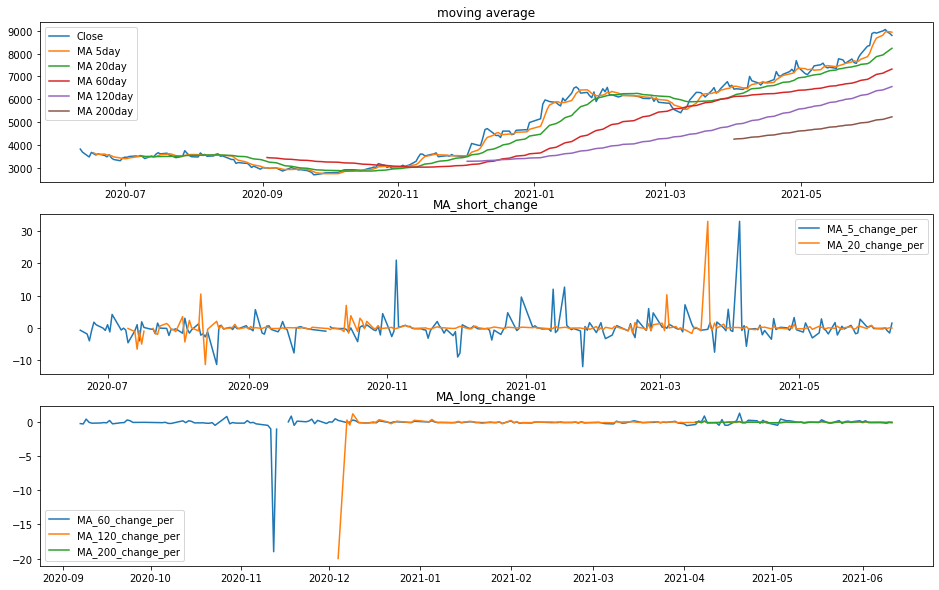

In [4]:
drawGraph(47040)

In [10]:
url = 'localhost:8668/stock/getStockData?stockCode=0490'

In [11]:
stockCode = url.split("?")[-1].split("=")[-1]

In [12]:
stockCode

'0490'

In [123]:
sellBuyDay(131290)

[Timestamp('2021-05-11 00:00:00'), Timestamp('2021-06-10 00:00:00')]

In [124]:
arr = sellBuyDay(102280)

day = {'lastSellDay' : '', 'lastBuyDay' : ''}

day['lastSellDay'] = arr[0]
day['lastBuyDay'] = arr[1]

In [125]:
day

{'lastSellDay': Timestamp('2021-06-11 00:00:00'),
 'lastBuyDay': Timestamp('2020-12-28 00:00:00')}

In [127]:
date.today() == arr[0]

True

In [20]:
str(arr[0])

'2021-06-04 00:00:00'

## 수익률을 계산해보자

In [89]:
days = sellBuyDay(stockCode)

In [90]:
sellday = arr[0] 

buyday = arr[1]

df = pd.datetime.now()

sellday = pd.to_datetime(sellday).date()


buyday = pd.to_datetime(buyday).date()




buydayInfo = fdr.DataReader(stockCode, buyday, buyday)
selldayInfo = fdr.DataReader(stockCode, sellday, sellday)

buyDayClose = buydayInfo.Close
sellDayClose = selldayInfo.Close

buyDayCloseDf = pd.DataFrame(buyDayClose)
sellDayCloseDf =  pd.DataFrame(sellDayClose)

buyDayClosePrice = buyDayCloseDf.Close[0]
sellDayClosePrice = sellDayCloseDf.Close[0]

## 주당 순이익
profitPerOneStock = sellDayClosePrice - buyDayClosePrice

marginPercent = round((profitPerOneStock / sellDayClosePrice) * 100)

marginPercent

In [128]:
selldayInfo

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-28,380000,381500,369500,372500,545333,-0.013245


In [ ]:
a = pg.alert(text='내용입니다', title='제목입니다', button='OK')